## 积分总览
积分是一个很强的工具，可以帮助我们计算不规则图形的面积，帮助我们求不规则形状物体的体积，帮助我们求变速运动物体的路程    
接下来分为三个部分来介绍定积分的基本原理：求和符号以及伸缩求和法；寻求位移和面积之间的关系；用分割法去求面积  
### 求和符号以及伸缩求和法
#### 求和符号
首先是求和符号，当我们想要求解1+2+3+...+100时，仅仅靠纯手写太过于繁琐，我们可以使用$\sum_{n=1}^{100}n$,对，这是一个求和符号，下面那个代表起始的位置，上面代表终止的位置，右边的是一个表达式。   
当然，这个比较简单，我们可以稍微上一点难度，比如说$sin(1) + sin(3) + sin(5) + ... + sin(2997) + sin(2999) + sin(3001)$  
嗯，这个还可以，首先是$sin$,然后就是全是奇数，我们可以想到2n-1可以代表奇数，然后可以写出$\sum_{n=1}^{3001}sin(2n-1)$,但是很显然这不对，因为最后一个数是sin(6001),这时候将上限改成1501应该就可以，比如接下来这样$\sum_{n=1}^{1501}sin(2n-1)$     
#### 伸缩求和法
$\sum_{j=1}^{5}(j^2 - (j-1)^2)$,观察这个式子，我们可以发现，最后仅仅留下两项，也就是第一项和最后一项。这种类型的级数就叫做伸缩级数，你可以将它合并成更简单的形式，这就像套缩那些老式的小望远镜一样。我们可以得到一个一般性的表达式，$\sum_{j=a}^{b}(f(j)-f(j-1)) = f(b) - f(a-1)$   
可以几个例子看一看      $\sum_{j=10}^{100}(e^{cos(j)}-e^{cos(j-1)}) = e^{cos(100)} - e^{cos(9)}$ 这当然是合理的。  
这里还有另一个例子$\sum_{j=1}^{n}(j^2-(j-1)^2)$,通过下面推到出来的规律，我们可以得到最后结果是$n^2$,但是如果我们先进行化简的话，我们就可以得到$\sum_{j=1}^{n}(2j-1)$,这也就是说前n个级数的和为$n^2$,额，很意外。我们可以深入分析一下，将上面已经化简的式子$\sum_{j=1}^{n}(j^2-(j-1)^2)$，进一步分解一下$\sum_{j=1}^{n}2j - \sum_{j=1}^{n}1 = n^2$,再来一步$2\sum_{j=1}^{n}j - \sum_{j=1}^{n}1 = n^2$,嗯，接着移项一下$\sum_{j=1}^{n}j   =\frac{1}{2}(n^2 + \sum_{j=1}^{n}1)$
嗯，是的这样我们推到出来了一个公式$\sum_{j=1}^{n}j   = \frac{n(n+1)}{2}$

ok,目前来说我们已经推到出了一个求和公式，可以在简单的扩展一下，比如我们刚才求解的平方项，那么立方项会有什么不一样吗     
$\sum_{j=1}^{n}(j^3 - (j-1)^3) = n^3$,这是由上面的伸缩级数推到出来的，这很容易，我们可以将表达式化简一下$\sum_{j=1}^{n}(3j^2-3j+1) = n^3$,      
$3\sum_{j=1}^{n}j^2 - 3\sum_{j=1}^{n}j + \sum_{j=1}^{n}1 = n^3$     
然后通过移项
$\sum_{j=1}^{n}j^2 = \frac{1}{3}(n^3 + \frac{3n(n+1)}{2} - n)$      
最后我们得到了一个公式      
$\sum_{j=1}^{n}j^2 = \frac{n(n+1)(2n+1)}{6}$
嗯，这很合理。

### 位移和面积

Text(0, 0.5, 'speed')

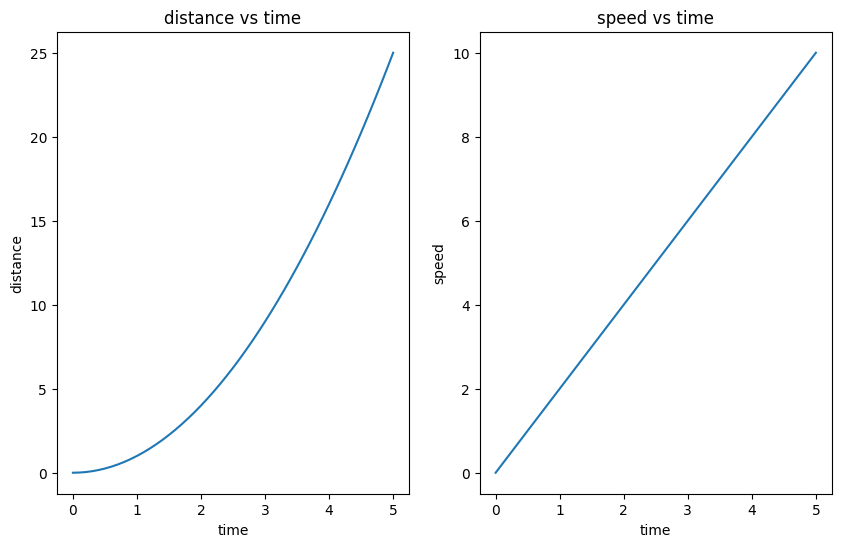

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.1*i for i in range(0,51)]
y = [0.01*i*i for i in range(0,51)]

x_1 = [0.1*i for i in range(0,51)]
y_1 = [0.2*i for i in range(0,51)]

x_2 = [0.1*i for i in range(0,51)]
y_2 = [2 for i in range(0,51)]

plt.figure(figsize = (10,6))

ax = plt.subplot(1,2,1)
ax.plot(x,y)
ax.set_title("distance vs time")
ax.set_xlabel("time")
ax.set_ylabel("distance")

ax = plt.subplot(1,2,2)
ax.plot(x_1,y_1)
ax.set_title("speed vs time")
ax.set_xlabel("time")
ax.set_ylabel("speed")


在上面的图中，左边是位移的图像，右边是速度的图像。但是假如我们现在仅仅知道第二张图像，我们应该怎么求解第一张图像    
用文字来叙述也就是如果你知道一辆汽车在某一时段内每一时刻的行驶速度，那么它在这个时间段内的总位移是多少呢？  
首先我们需要知道一点前置知识，$x=vt$,嗯，v代表速度，t代表时间，x代表着位移，当然也许这里使用路程更合适      
在0到1秒，v等于多少，从图中可以看出v=1，x=vt的话，可以得到x=1，当然，这其实代表0到1范围中，速度的线和坐标轴围成的面积。     
既然我们可以求出来0到1之间的位移，那么我们可以不可以推广一下，求一下任意时间段的位移，然后将它们累加，不就是所有的时间的位移了吗    
$总位移 = \sum_{j=1}^{n}v_j(t_j - t_{j-1})$。直到目前位置，我们使用的还都是代数，我觉得是时候引入积分了     
在引入积分前，我们先看一张图


Text(0, 0.5, 'speed')

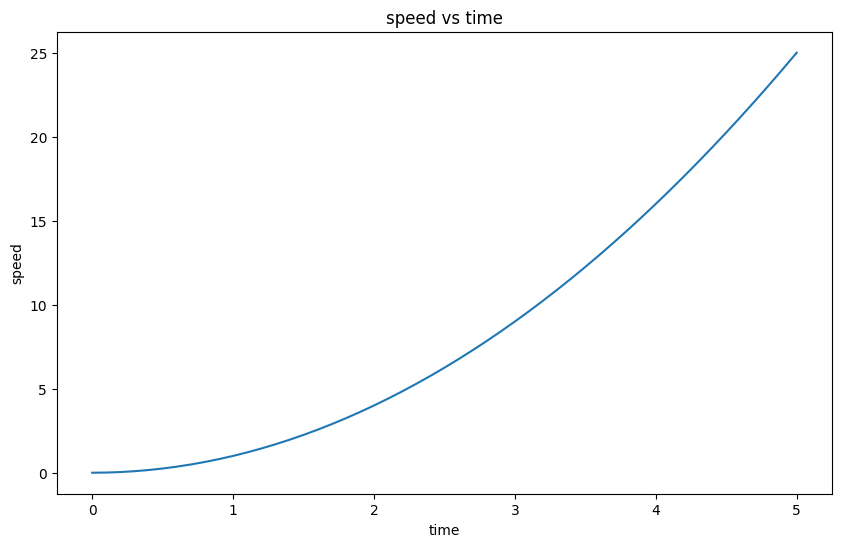

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.1*i for i in range(0,51)]
y = [0.01*(i*i) for i in range(0,51)]


plt.figure(figsize = (10,6))

ax = plt.subplot(1,1,1)
ax.plot(x,y)
ax.set_title("speed vs time")
ax.set_xlabel("time")
ax.set_ylabel("speed")




在上文中这代表位移，但是在这里，它代表了速度，这其实更加复合显示情况，比如说，在路上，马上要绿灯的时候，车的速度，嗯。在上文中，我们可以很清晰的使用$x=vt$这个公式，计算它的面积是简洁而且简答的，但是现在不一样了，我们很难计算出0到1时，速度曲线和坐标轴围成的面积。      
很直观的一个方法就是不断的逼近，是的，就是不断的逼近，我们可以使用1点时的速度来代表0到1点的速度，然后我们可以求出面积，当然这样误差会很大，但是我们可以沿着这个思路继续走下去，0-1这个区间可以不可以继续细分，一直细分，比如分成一万块，或者一亿块，或者干脆分到不能细分，嗯，这样就可以用它们的面积来代表这一块曲线的面积。    
ok，我们完全可以使用极限来代表这下东西，比如说，我们规定划分的区间中最大的区间要趋近于0。   
$\lim_{mesh \rightarrow  0} \sum_{j=1}^{n}v(c_j)(t_j - t_{j-1})$,这里mesh代表最大的区间间隔，$c_j$代表这在$j-1到j$的区间中使用j在值作为速度，当然这会使得我们计算出来的面积比真实的面积要大，不过问题不大. 

上面仅仅是一个概述，具体来说，积分的求解过程，以及会用到哪些技巧，在定积分那一节会详细解释。